In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib     
import time
import scipy.signal as signal
import os
import seaborn as sns
import latex

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
%matplotlib inline

In [65]:
main_path = r"Programowanie_Ron_wyniki/Programowanie_Ron_wyniki_AmpOn=1.5_dtOn=0.015_1.csv"
data = pd.read_csv(main_path)
data

,Timestamp,No. pulses,No. Test,R,Succes,dt_Ron,Amp_RonR,q,E_memristor,State
0,1.676310e+09,0,0,799.418383,False,0.015,1.5,0.000000,0.000000,R_off
1,1.676310e+09,1,0,5.583429,False,0.015,1.5,0.002587,0.001748,Unknown
2,1.676310e+09,2,0,2.827080,True,0.015,1.5,0.003212,0.001524,R_on
3,1.676310e+09,0,1,577.472372,False,0.015,1.5,0.000000,0.000000,R_off
4,1.676310e+09,1,1,1.687071,True,0.015,1.5,0.003706,0.001198,R_on
...,...,...,...,...,...,...,...,...,...,...
336,1.676311e+09,4,99,2.970202,True,0.015,1.5,0.003250,0.001531,R_on
337,1.676311e+09,0,100,507.246247,False,0.015,1.5,0.000000,0.000000,R_off
338,1.676311e+09,1,100,3.183956,False,0.015,1.5,0.003197,0.001569,Unknown
339,1.676311e+09,2,100,3.012139,False,0.015,1.5,0.003252,0.001543,Unknown


In [66]:
data.columns = ["Time", "Pulses", "Tests",'R','isSucces','dt_Ron',
       'Amp_Ron', 'q', 'E_memristor', 'State']

In [67]:
data.columns

Index(['Time', 'Pulses', 'Tests', 'R', 'isSucces', 'dt_Ron', 'Amp_Ron', 'q',
       'E_memristor', 'State'],
      dtype='object')

In [68]:
data.head()

,Time,Pulses,Tests,R,isSucces,dt_Ron,Amp_Ron,q,E_memristor,State
0,1.676310e+09,0,0,799.418383,False,0.015,1.5,0.000000,0.000000,R_off
1,1.676310e+09,1,0,5.583429,False,0.015,1.5,0.002587,0.001748,Unknown
2,1.676310e+09,2,0,2.827080,True,0.015,1.5,0.003212,0.001524,R_on
3,1.676310e+09,0,1,577.472372,False,0.015,1.5,0.000000,0.000000,R_off
4,1.676310e+09,1,1,1.687071,True,0.015,1.5,0.003706,0.001198,R_on


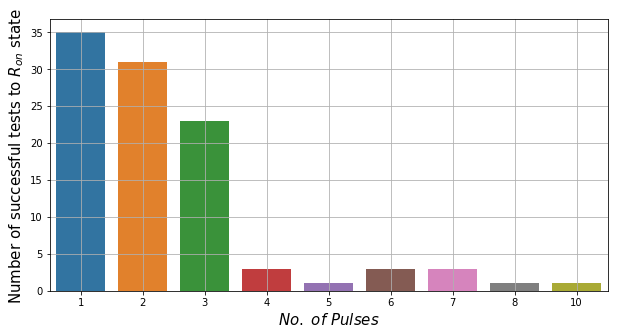

In [69]:
temp_data = data[data["isSucces"]==True].groupby(by="Pulses").count()
plt.figure(figsize=(10,5))
sns.barplot( x=temp_data.index, y="R", data=temp_data)
plt.xlabel("$No.\ of\ Pulses$", fontsize=15)
plt.ylabel("Number of successful tests to $R_{on}$ state ", fontsize=15)
plt.grid(True)
plt.show()


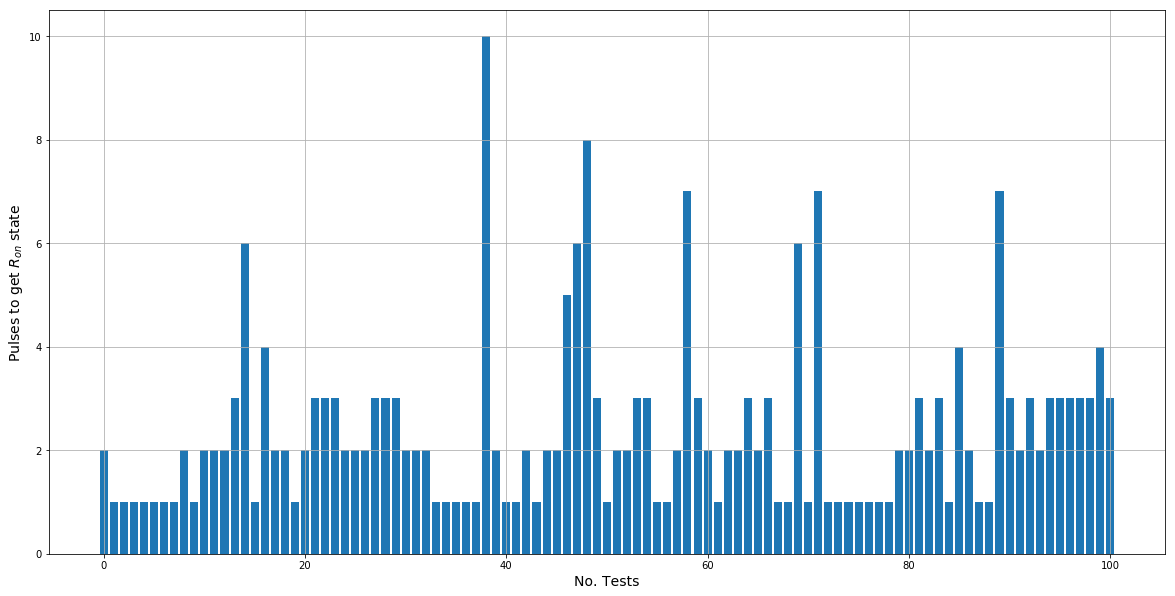

In [70]:
temp_data = data[data["isSucces"]==True]
plt.figure(figsize=(20,10))
plt.bar(x=temp_data["Tests"], height=temp_data["Pulses"],width=0.8)
plt.xlabel("No. Tests",fontdict={'fontsize':14})
plt.ylabel("Pulses to get $R_{on}$ state",fontdict={'fontsize':14})
plt.grid(True)




In [71]:
data['Q_integrated'] = np.nan
data['E_integrated'] = np.nan



for i in data.index:
    if data.loc[i,"Pulses"] == 0:
        data.loc[i,"Q_integrated"] = 0
    else:
        data.loc[i,"Q_integrated"] = data.loc[i-1,"Q_integrated"]+data.loc[i,"q"]
    if data.loc[i,"Pulses"] == 0:
        data.loc[i,"E_integrated"] = 0
    else:
        data.loc[i,"E_integrated"] = data.loc[i-1,"E_integrated"]+data.loc[i,"E_memristor"]

data['Q_integrated']





0      0.000000
1      0.002587
2      0.005799
3      0.000000
4      0.003706
         ...   
336    0.012879
337    0.000000
338    0.003197
339    0.006449
340    0.009700
Name: Q_integrated, Length: 341, dtype: float64

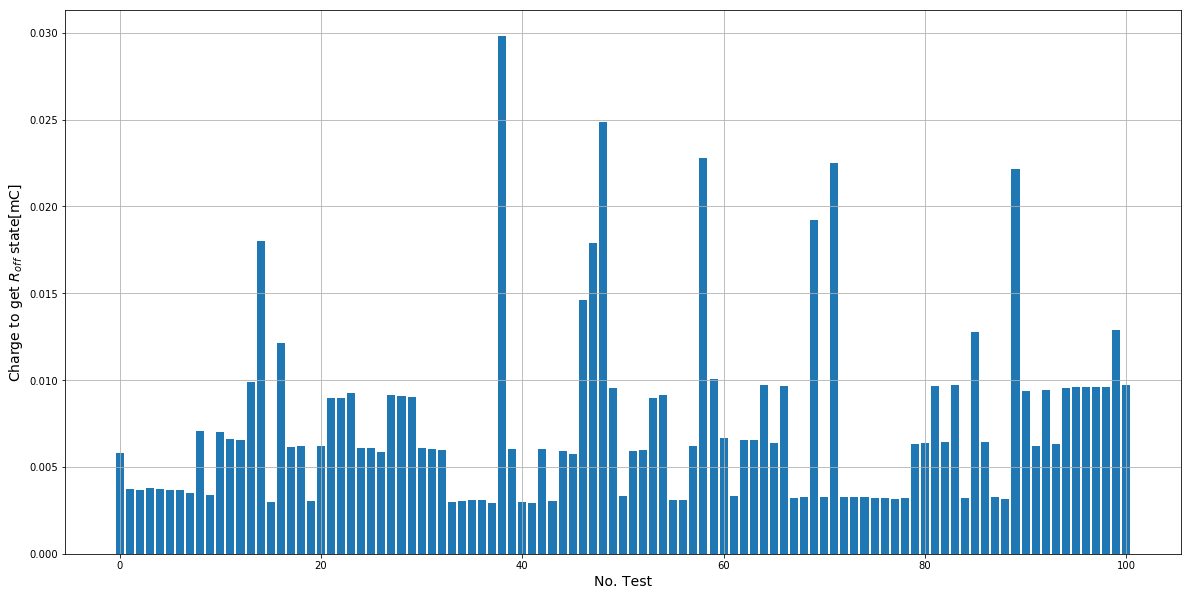

In [72]:
temp_data = data[data["isSucces"]==True]
plt.figure(figsize=(20,10))
plt.bar(x=temp_data["Tests"], height=temp_data["Q_integrated"],width=0.8)
plt.xlabel("No. Test",fontdict={'fontsize':14})
plt.ylabel("Charge to get $R_{off}$ state[mC]",fontdict={'fontsize':14})
plt.grid(True)



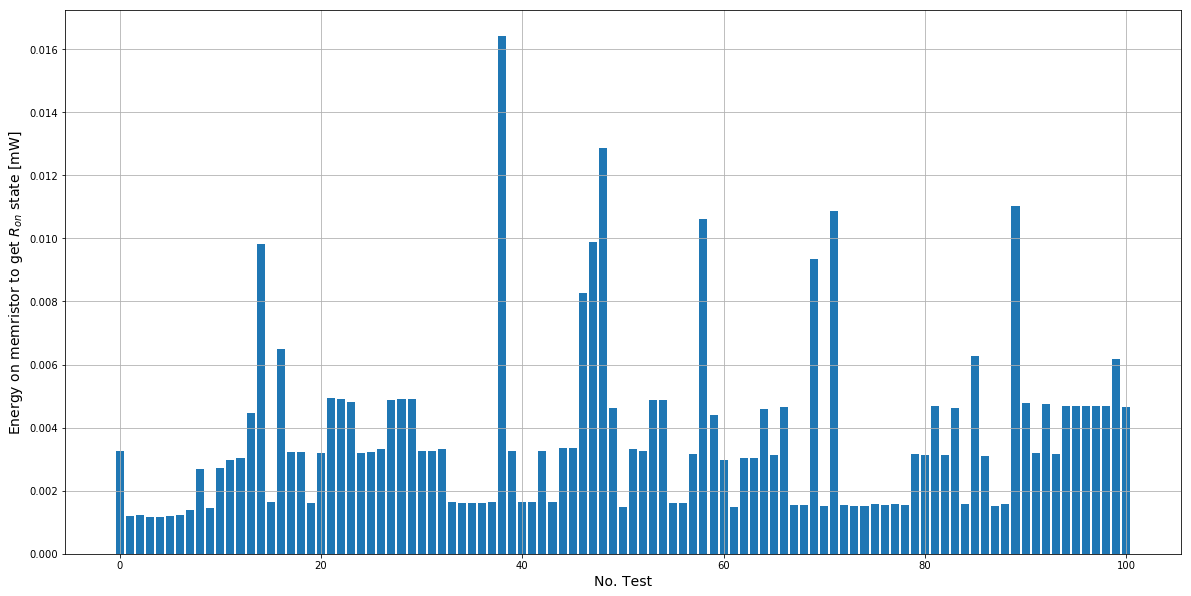

In [73]:

temp_data = data[data["isSucces"]==True]
plt.figure(figsize=(20,10))
plt.bar(x=temp_data["Tests"], height=temp_data["E_integrated"],width=0.8,)
plt.xlabel("No. Test",fontdict={'fontsize':14})
plt.ylabel("Energy on memristor to get $R_{on}$ state [mW]",fontdict={'fontsize':14})
plt.grid(True)


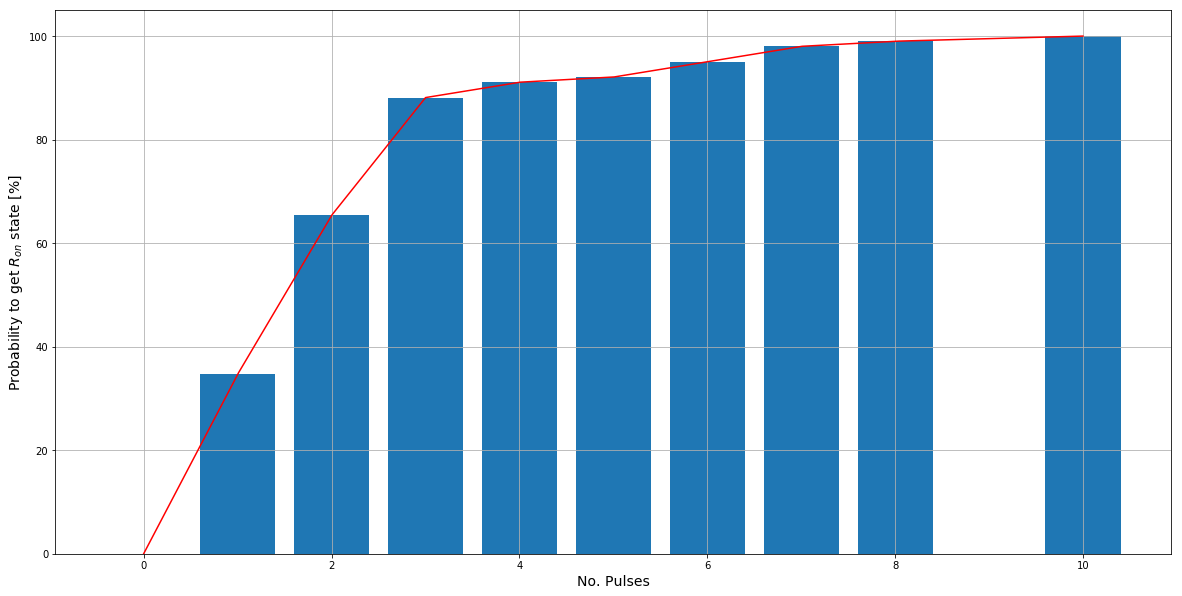

In [74]:
from scipy.interpolate import interp1d

number_of_tests = len(data["Tests"].unique())

temp_data = data[data["isSucces"]==True].groupby(by="Pulses",as_index=False).count()
temp_data['Probability'] = np.multiply(temp_data['R'],1/number_of_tests)
temp_data.reset_index(inplace=True)
P = 0
for i in temp_data.index:
    P = temp_data.loc[i,'Probability']+P
    temp_data.loc[i,'Probability'] = P
x = temp_data['Pulses'].to_numpy()
x = np.insert(x,0,0)
y = temp_data['Probability'].to_numpy()
y = np.insert(y,0,0)*100

plt.figure(figsize=(20,10))
plt.bar(x=x, height=y,width=0.8)
plt.xlabel("No. Pulses",fontdict={'fontsize':14})
plt.ylabel("Probability to get $R_{on}$ state [%]",fontdict={'fontsize':14})
plt.grid(True)
x_i = np.arange(start= np.min(x),stop= np.max(x),step=0.001)

cs = interp1d(x, y)
plt.plot(x_i, cs(x_i),'r') 
#bla bla


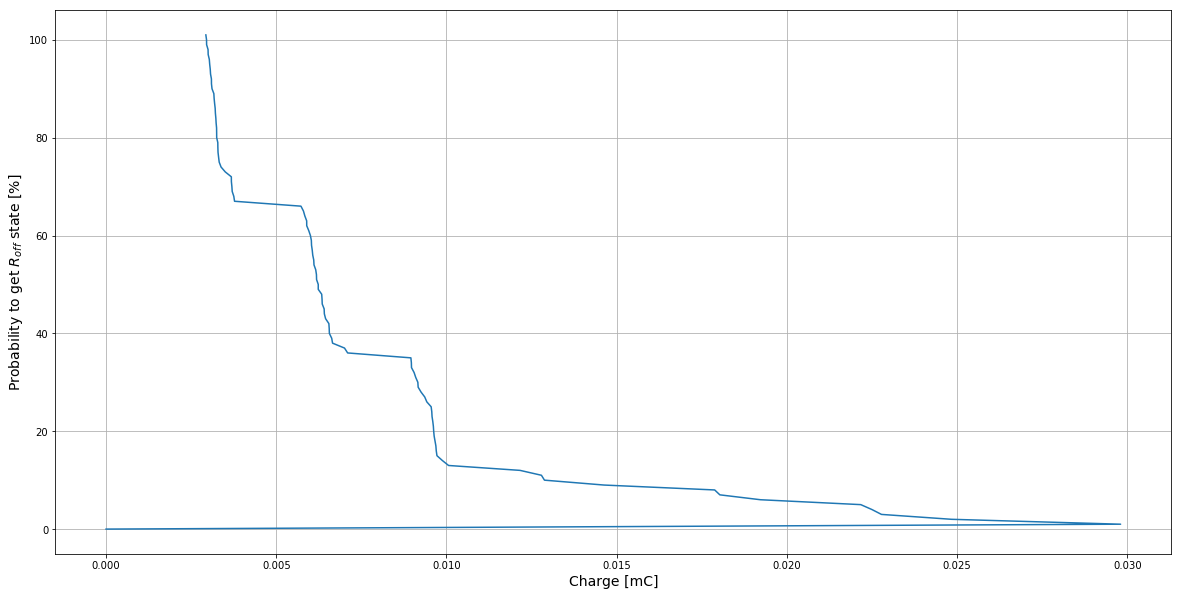

In [75]:

number_of_tests = np.max(data["Tests"])

temp_data = data[data["isSucces"]==True].groupby(by="Q_integrated",as_index=False).count()
temp_data.sort_values(by="Q_integrated",ascending=False,inplace=True)
temp_data.reset_index(drop=True,inplace=True)
temp_data

temp_data['Probability'] = np.multiply(temp_data['R'],1/number_of_tests)
P = 0

for i in temp_data.index:
    P = temp_data.loc[i,'Probability']+P
    temp_data.loc[i,'Probability'] = P

x = temp_data['Q_integrated'].to_numpy()
x = np.insert(x,0,0)
y = temp_data['Probability'].to_numpy()
y = np.insert(y,0,0)*100

plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.xlabel("Charge [mC]",fontdict={'fontsize':14})
plt.ylabel("Probability to get $R_{off}$ state [%]",fontdict={'fontsize':14})
plt.grid(True)
x_i = np.arange(start= np.min(x),stop= np.max(x),step=0.001)

cs = interp1d(x, y,kind='previous')


t = data["R"] == "nan"
t = np.where(t==True)
data.iloc[t[0]]
data =data.drop(labels = t[0],axis=0).reset_index(drop=True)
data["R"] = data["R"].astype(np.float64)



#plt.plot(x_i, cs(x_i),'r')




In [76]:
data

,Time,Pulses,Tests,R,isSucces,dt_Ron,Amp_Ron,q,E_memristor,State,Q_integrated,E_integrated
0,1.676310e+09,0,0,799.418383,False,0.015,1.5,0.000000,0.000000,R_off,0.000000,0.000000
1,1.676310e+09,1,0,5.583429,False,0.015,1.5,0.002587,0.001748,Unknown,0.002587,0.001748
2,1.676310e+09,2,0,2.827080,True,0.015,1.5,0.003212,0.001524,R_on,0.005799,0.003272
3,1.676310e+09,0,1,577.472372,False,0.015,1.5,0.000000,0.000000,R_off,0.000000,0.000000
4,1.676310e+09,1,1,1.687071,True,0.015,1.5,0.003706,0.001198,R_on,0.003706,0.001198
...,...,...,...,...,...,...,...,...,...,...,...,...
336,1.676311e+09,4,99,2.970202,True,0.015,1.5,0.003250,0.001531,R_on,0.012879,0.006180
337,1.676311e+09,0,100,507.246247,False,0.015,1.5,0.000000,0.000000,R_off,0.000000,0.000000
338,1.676311e+09,1,100,3.183956,False,0.015,1.5,0.003197,0.001569,Unknown,0.003197,0.001569
339,1.676311e+09,2,100,3.012139,False,0.015,1.5,0.003252,0.001543,Unknown,0.006449,0.003112


In [77]:
temp_data = data[data['State'] == "Unknown"]


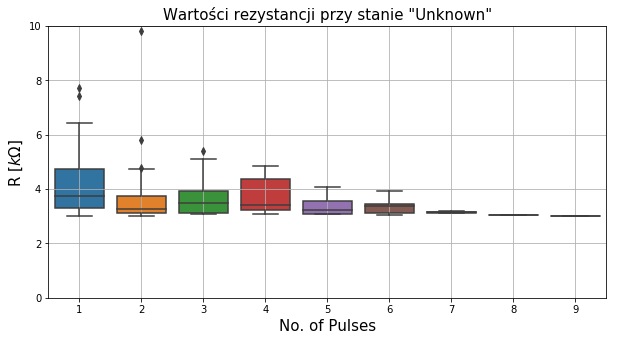

In [79]:
plt.figure(figsize=(10,5))
sns.boxplot(data=temp_data, x="Pulses",y="R")
plt.xlabel("No. of Pulses", fontsize=15)
plt.ylabel("R $[k\Omega]$ ", fontsize=15)
plt.grid(True)
plt.ylim(0,10)

plt.title('Wartości rezystancji przy stanie "Unknown"', fontsize = 15)
plt.show()



In [60]:
temp_data = data[data['Pulses'] != 0]

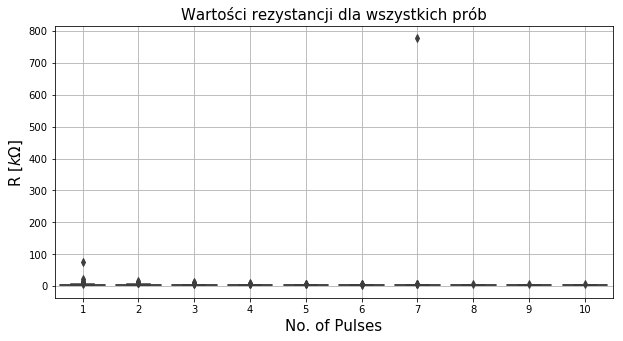

In [61]:


plt.figure(figsize=(10,5))
sns.boxplot(data=temp_data, x="Pulses",y="R")
plt.xlabel("No. of Pulses", fontsize=15)
plt.ylabel("Number of successful tests to $R_{on}$ state ", fontsize=15)
plt.grid(True)
#plt.ylim((0,800))
plt.ylabel("R $[k\Omega]$ ", fontsize=15)
plt.title("Wartości rezystancji dla wszystkich prób", fontsize=15)
plt.show()
#plt.savefig('histogram.pgf')

In [62]:
k = np.logical_and( temp_data["Pulses"]>=3, temp_data["R"]>=100 )
k = np.where(k==True)
ind = temp_data.iloc[k[0]].index
temp_data =temp_data.drop(index=ind,axis=0).reset_index(drop=True)
#temp_data.max()


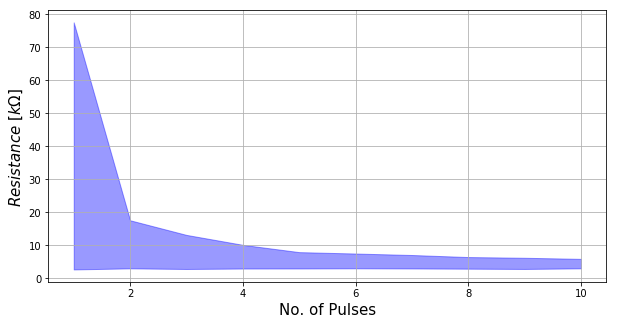

In [63]:
plt.figure(figsize=(10,5))
max = temp_data.groupby('Pulses').max()["R"]
min = temp_data.groupby('Pulses').min()["R"]
plt.fill_between(max.index, max, min, alpha=0.4, color='blue')
plt.xlabel("No. of Pulses", fontsize=15)
plt.ylabel("$Resistance\ [k\Omega]$ ", fontsize=15)
plt.grid(True)
#plt.ylim((0,25))

In [64]:
data[data['State']=="R_off"].min()

Time            1675773873.41196
Pulses                         0
Tests                          0
R                       77.59165
isSucces                   False
dt_Ron                     0.005
Amp_Ron                      1.0
q                            0.0
E_memristor                  0.0
State                      R_off
Q_integrated                 0.0
E_integrated                 0.0
dtype: object